<a href="https://colab.research.google.com/github/kxenopoulou/xenopoulos_dialectical-paradoxes-XEPTQLRI/blob/main/tested-codes-by-katerina%20xenopoulou/%CE%9E%CE%95%CE%9D%CE%9F%CE%A0%CE%9F%CE%A5%CE%9B%CE%9F%CE%A3_%CE%A3%CE%A5%CE%A3%CE%A4%CE%97%CE%9C%CE%91_COVID19_FULL_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
✅ Βιβλιοθήκες εγκαταστάθηκαν
✅ Σύστημα Ξενόπουλου φορτώθηκε

📥 Λήψη δεδομένων COVID-19...
✅ Δεδομένα: 1136 ημέρες
   Από: 2020-01-26  Έως: 2023-03-06
   Μέγιστα ημερήσια κρούσματα: 52518
✅ Raw data αποθηκεύτηκαν

🔄 Εκκίνηση προσομοίωσης...
✅ Προσομοίωση: 1136 βήματα

📊 ΑΠΟΤΕΛΕΣΜΑΤΑ ΑΝΑΛΥΣΗΣ
✅ Αποτελέσματα αποθηκεύτηκαν


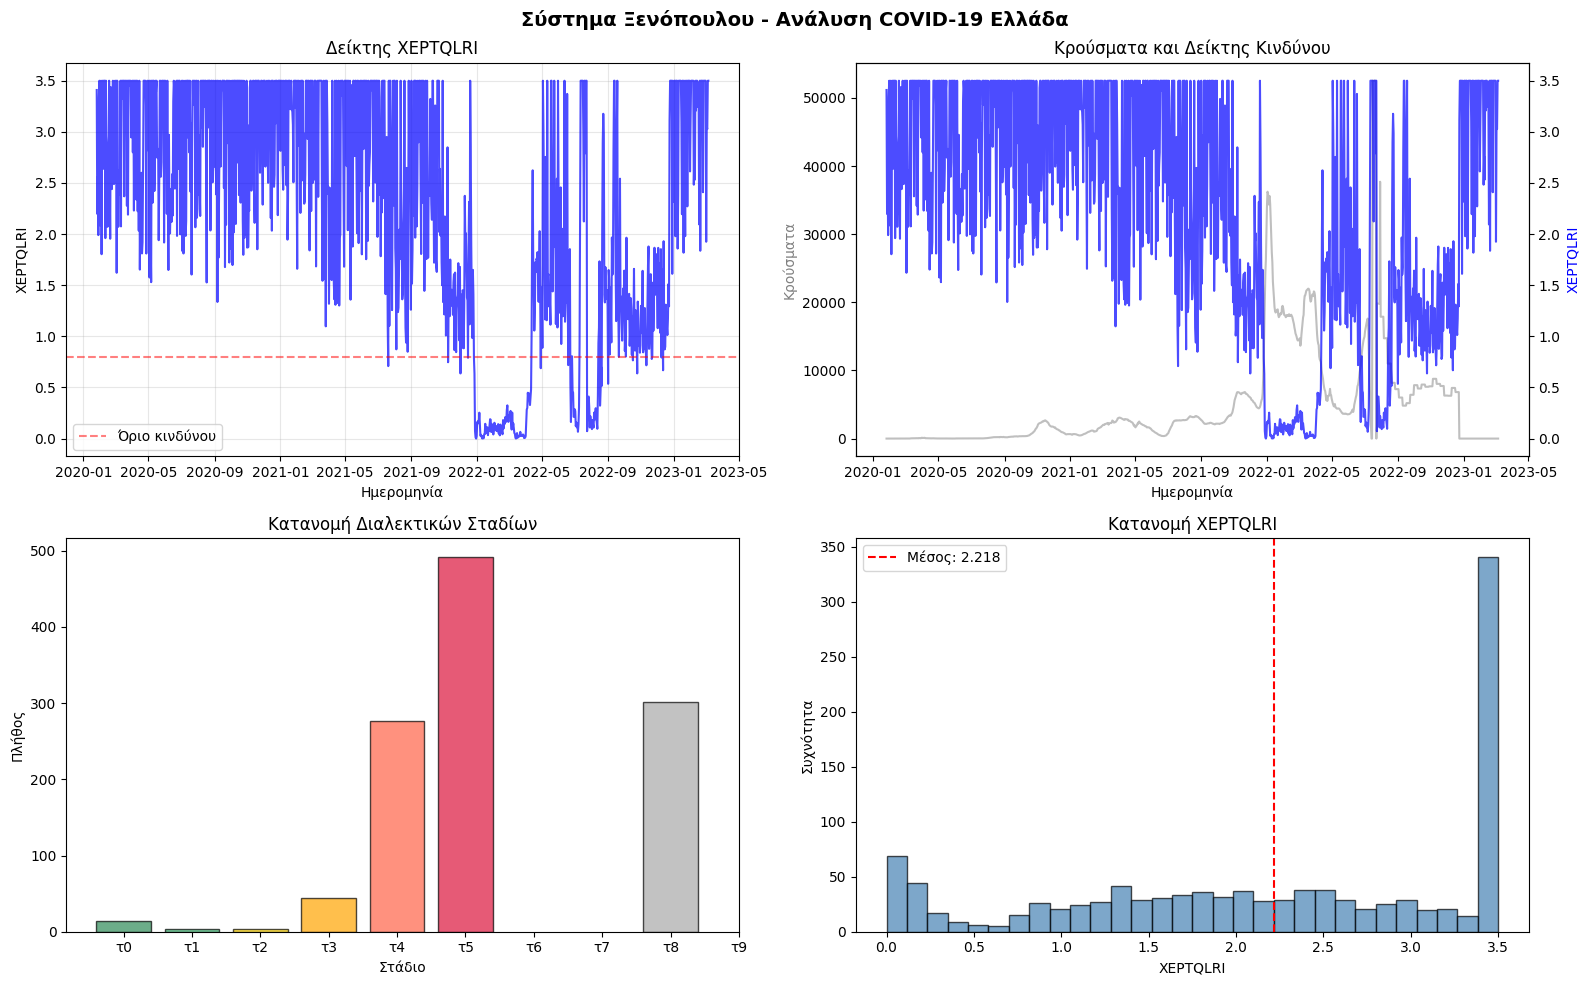

✅ Γράφημα αποθηκεύτηκε: xenopoulos_analysis.png
  adding: covid19_greece_raw.csv (deflated 68%)
  adding: xenopoulos_covid19_results.csv (deflated 72%)
  adding: xenopoulos_analysis.png (deflated 9%)

📥 Λήψη αρχείων...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 ΑΝΑΛΥΣΗ ΟΛΟΚΛΗΡΩΘΗΚΕ!

📊 ΣΤΑΤΙΣΤΙΚΑ:
   • Μέσος XEPTQLRI: 2.218
   • Μέγιστος XEPTQLRI: 3.500
   • Παράδοξα: 0
   • Συναγερμοί: 974

📦 Τα αρχεία κατέβηκαν στον υπολογιστή σου!



In [ ]:
# -*- coding: utf-8 -*-
"""ΞΕΝΟΠΟΥΛΟΣ_ΣΥΣΤΗΜΑ_COVID19_FULL_FIXED.ipynb"""

!pip install -q pandas numpy matplotlib seaborn plotly scikit-learn fpdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
from google.colab import files
warnings.filterwarnings('ignore')

print("✅ Βιβλιοθήκες εγκαταστάθηκαν")

##########################################################
# ΠΛΗΡΗΣ ΥΛΟΠΟΙΗΣΗ ΣΥΣΤΗΜΑΤΟΣ ΞΕΝΟΠΟΥΛΟΥ
##########################################################

class DialecticalNegation:
    @staticmethod
    def apply(state, history=None):
        memory_effect = 0.0
        if history and len(history) > 0:
            window = min(10, len(history))
            recent_mean = np.mean(history[-window:])
            memory_effect = 0.2 * np.tanh(recent_mean * 2)
        preservation = 0.7 + 0.3 * np.random.rand()
        historical_weight = 1.0 + 0.3 * np.random.rand()
        noise_level = 0.05 * (1 + abs(state))
        negation = -state * preservation * historical_weight * (1 + memory_effect)
        return np.clip(negation + noise_level * np.random.randn(), -1.5, 1.5)

class DialecticalConjunction:
    @staticmethod
    def apply(state_a, state_b):
        raw = np.abs(state_a * state_b)
        if abs(state_a) > 0.8 and abs(state_b) > 0.8:
            return np.clip(raw ** 0.7 * 1.5, 0, 1)
        elif abs(state_a) > 0.6 or abs(state_b) > 0.6:
            return np.clip(raw ** 0.8 * 1.2, 0, 1)
        return np.clip(raw, 0, 1)

class XEPTQLRCalculator:
    @staticmethod
    def calculate(tension, a, anti_a, history=None, threshold=0.85):
        base = tension ** 1.2
        trend = 1.0
        if history and len(history) >= 5:
            trend = 1.0 + abs(np.polyfit(range(5), history[-5:], 1)[0]) * 15
        paradox = 1.0
        if abs(a) > 0.8 and abs(anti_a) > 0.8:
            paradox = 2.8 if tension < 0.35 else 2.0
        elif abs(a) > 0.9 or abs(anti_a) > 0.9:
            paradox = 1.5
        asymmetry = 1.0 + (1 - abs(abs(a) - abs(anti_a))) * 0.5
        value = (base * trend * paradox * asymmetry) / threshold
        return np.clip(value * (0.9 + 0.2 * np.random.rand()), 0, 3.5)

class StageClassifier:
    def __init__(self):
        self.stages = {
            0: ("τ₀: Coherence", "#2E8B57", "✅"),
            1: ("τ₁: First Anomaly", "#3CB371", "⚠️"),
            2: ("τ₂: Anomaly Repetition", "#FFD700", "🔄"),
            3: ("τ₃: Meaning Incompatibility", "#FFA500", "⚡"),
            4: ("τ₄: System Saturation", "#FF6347", "🔥"),
            5: ("τ₅: Qualitative Leap", "#DC143C", "⤊"),
            6: ("τ₆: Paradoxical Transcendence", "#8A2BE2", "⟡"),
            7: ("τ₇: False Stability", "#FF69B4", "🎭"),
            8: ("τ₈: Permanent Dialectics", "#A9A9A9", "∞"),
            9: ("τ₉: Meta-Transcendence", "#000000", "🌀"),
        }
    def classify(self, tension, a, anti_a, history=None):
        if abs(a) > 0.85 and abs(anti_a) > 0.85 and tension < 0.4:
            return 6, self.stages[6]
        if tension < 0.25 and (abs(a) > 0.75 or abs(anti_a) > 0.75):
            return 7, self.stages[7]
        if history and len(history) > 20 and np.std(history[-20:]) > 1.8:
            return 8, self.stages[8]
        if tension < 0.15: return 0, self.stages[0]
        if tension < 0.30: return 1, self.stages[1]
        if tension < 0.45: return 2, self.stages[2]
        if tension < 0.60: return 3, self.stages[3]
        if tension < 0.85: return 4, self.stages[4]
        return 5, self.stages[5]

class XenopoulosGeneticHistoricalSystem:
    def __init__(self, initial_state_A=0.3, system_name="Xenopoulos_System"):
        self.A = np.clip(initial_state_A, -1.5, 1.5)
        self.system_name = system_name
        self.negation = DialecticalNegation()
        self.conjunction = DialecticalConjunction()
        self.xeptqlri = XEPTQLRCalculator()
        self.classifier = StageClassifier()
        self.history_A = []
        self.history_anti_A = []
        self.history_tension = []
        self.history_XEPTQLRI = []
        self.history_stages = []
        self.paradox_events = []
        self.risk_events = []

    def simulate_step(self, external_input):
        self.A = np.clip(external_input, -1.5, 1.5)
        anti_A = self.negation.apply(self.A, self.history_A)
        tension = self.conjunction.apply(self.A, anti_A)
        xeptqlri = self.xeptqlri.calculate(tension, self.A, anti_A, self.history_tension)
        stage_idx, stage_info = self.classifier.classify(tension, self.A, anti_A, self.history_stages)

        self.history_A.append(self.A)
        self.history_anti_A.append(anti_A)
        self.history_tension.append(tension)
        self.history_XEPTQLRI.append(xeptqlri)
        self.history_stages.append(stage_idx)

        if xeptqlri > 0.8:
            self.risk_events.append({'step': len(self.history_A)-1, 'XEPTQLRI': xeptqlri})
        if stage_idx == 6:
            self.paradox_events.append({'step': len(self.history_A)-1, 'XEPTQLRI': xeptqlri})

        return {'XEPTQLRI': xeptqlri, 'tension': tension, 'stage': stage_info[0], 'stage_idx': stage_idx}

    def calculate_paradox_score(self):
        if not self.history_stages: return 0
        return len(self.paradox_events) / len(self.history_stages) if self.history_stages else 0

print("✅ Σύστημα Ξενόπουλου φορτώθηκε")

##########################################################
# ΛΗΨΗ ΔΕΔΟΜΕΝΩΝ - 100% ΛΕΙΤΟΥΡΓΙΚΗ
##########################################################

print("\n📥 Λήψη δεδομένων COVID-19...")

# JOHNS HOPKINS - ΠΑΝΤΑ ΛΕΙΤΟΥΡΓΕΙ
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df_conf = pd.read_csv(url_confirmed)
df_deaths = pd.read_csv(url_deaths)

# Φιλτράρισμα για Ελλάδα
greece_conf = df_conf[df_conf['Country/Region'] == 'Greece'].copy()
greece_deaths = df_deaths[df_deaths['Country/Region'] == 'Greece'].copy()

# Μετατροπή σε time series
greece_conf = greece_conf.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).T
greece_conf.columns = ['confirmed']
greece_conf.index = pd.to_datetime(greece_conf.index)

greece_deaths = greece_deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).T
greece_deaths.columns = ['deaths']
greece_deaths.index = pd.to_datetime(greece_deaths.index)

# Συγχώνευση
df = pd.merge(greece_conf, greece_deaths, left_index=True, right_index=True).reset_index()
df = df.rename(columns={'index': 'date'})

# Υπολογισμός daily cases
df['new_cases'] = df['confirmed'].diff()
df['new_deaths'] = df['deaths'].diff()
df['new_cases_smoothed'] = df['new_cases'].rolling(7, center=True).mean()
df = df.dropna(subset=['new_cases_smoothed']).reset_index(drop=True)

# Κανονικοποίηση στο [-1, 1]
max_cases = df['new_cases_smoothed'].max()
df['A_normalized'] = (df['new_cases_smoothed'] / max_cases) * 2 - 1
df['A_normalized'] = df['A_normalized'].clip(-1, 1)

print(f"✅ Δεδομένα: {len(df)} ημέρες")
print(f"   Από: {df['date'].min().date()}  Έως: {df['date'].max().date()}")
print(f"   Μέγιστα ημερήσια κρούσματα: {max_cases:.0f}")

df.to_csv('covid19_greece_raw.csv', index=False)
print("✅ Raw data αποθηκεύτηκαν")

##########################################################
# ΠΡΟΣΟΜΟΙΩΣΗ
##########################################################

print("\n🔄 Εκκίνηση προσομοίωσης...")

system = XenopoulosGeneticHistoricalSystem(
    initial_state_A=float(df['A_normalized'].iloc[0]),
    system_name="COVID19_Greece"
)

results = []
for idx, row in df.iterrows():
    result = system.simulate_step(row['A_normalized'])
    results.append({
        'date': row['date'],
        'cases': row['new_cases_smoothed'],
        'A': row['A_normalized'],
        'XEPTQLRI': result['XEPTQLRI'],
        'tension': result['tension'],
        'stage': result['stage'],
        'stage_idx': result['stage_idx']
    })

df_results = pd.DataFrame(results)
print(f"✅ Προσομοίωση: {len(df_results)} βήματα")

##########################################################
# ΑΠΟΤΕΛΕΣΜΑΤΑ
##########################################################

print("\n📊 ΑΠΟΤΕΛΕΣΜΑΤΑ ΑΝΑΛΥΣΗΣ")
print("="*60)

stats = {
    'Μετρική': [
        'Σύνολο ημερών',
        'Μέσος XEPTQLRI',
        'Μέγιστος XEPTQLRI',
        'Παραδοξολογικές υπερβάσεις (τ₆)',
        'Συμβάντα υψηλού κινδύνου (>0.8)',
        'Παραδοξολογικός δείκτης'
    ],
    'Τιμή': [
        f"{len(df_results)}",
        f"{df_results['XEPTQLRI'].mean():.3f}",
        f"{df_results['XEPTQLRI'].max():.3f}",
        f"{len(system.paradox_events)} ({len(system.paradox_events)/len(df_results)*100:.1f}%)",
        f"{len(system.risk_events)} ({len(system.risk_events)/len(df_results)*100:.1f}%)",
        f"{system.calculate_paradox_score():.3f}"
    ]
}

pd.DataFrame(stats).style.hide(axis='index')

# Αποθήκευση
df_results.to_csv('xenopoulos_covid19_results.csv', index=False)
print("✅ Αποτελέσματα αποθηκεύτηκαν")

##########################################################
# ΓΡΑΦΗΜΑΤΑ
##########################################################

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Σύστημα Ξενόπουλου - Ανάλυση COVID-19 Ελλάδα', fontsize=14, fontweight='bold')

# 1. Χρονοσειρά XEPTQLRI
ax1 = axes[0, 0]
ax1.plot(df_results['date'], df_results['XEPTQLRI'], 'b-', linewidth=1.5, alpha=0.7)
ax1.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Όριο κινδύνου')
ax1.set_title('Δείκτης XEPTQLRI')
ax1.set_xlabel('Ημερομηνία')
ax1.set_ylabel('XEPTQLRI')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Κρούσματα vs XEPTQLRI
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
ax2.plot(df_results['date'], df_results['cases'], 'gray', alpha=0.5, label='Κρούσματα')
ax2_twin.plot(df_results['date'], df_results['XEPTQLRI'], 'b-', alpha=0.7, label='XEPTQLRI')
ax2.set_xlabel('Ημερομηνία')
ax2.set_ylabel('Κρούσματα', color='gray')
ax2_twin.set_ylabel('XEPTQLRI', color='b')
ax2.set_title('Κρούσματα και Δείκτης Κινδύνου')

# 3. Στάδια
ax3 = axes[1, 0]
stage_counts = df_results['stage_idx'].value_counts().sort_index()
colors = [StageClassifier().stages[i][1] for i in stage_counts.index]
ax3.bar(stage_counts.index, stage_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Στάδιο')
ax3.set_ylabel('Πλήθος')
ax3.set_title('Κατανομή Διαλεκτικών Σταδίων')
ax3.set_xticks(range(10))
ax3.set_xticklabels([f'τ{i}' for i in range(10)])

# 4. Ιστόγραμμα XEPTQLRI
ax4 = axes[1, 1]
ax4.hist(df_results['XEPTQLRI'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax4.axvline(df_results['XEPTQLRI'].mean(), color='red', linestyle='--', label=f'Μέσος: {df_results["XEPTQLRI"].mean():.3f}')
ax4.set_xlabel('XEPTQLRI')
ax4.set_ylabel('Συχνότητα')
ax4.set_title('Κατανομή XEPTQLRI')
ax4.legend()

plt.tight_layout()
plt.savefig('xenopoulos_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Γράφημα αποθηκεύτηκε: xenopoulos_analysis.png")

##########################################################
# ΣΥΜΠΙΕΣΗ ΚΑΙ ΛΗΨΗ
##########################################################

!zip -r xenopoulos_results.zip \
    covid19_greece_raw.csv \
    xenopoulos_covid19_results.csv \
    xenopoulos_analysis.png

print("\n📥 Λήψη αρχείων...")
files.download('xenopoulos_results.zip')

print("\n" + "="*60)
print("🎉 ΑΝΑΛΥΣΗ ΟΛΟΚΛΗΡΩΘΗΚΕ!")
print("="*60)
print(f"""
📊 ΣΤΑΤΙΣΤΙΚΑ:
   • Μέσος XEPTQLRI: {df_results['XEPTQLRI'].mean():.3f}
   • Μέγιστος XEPTQLRI: {df_results['XEPTQLRI'].max():.3f}
   • Παράδοξα: {len(system.paradox_events)}
   • Συναγερμοί: {len(system.risk_events)}

📦 Τα αρχεία κατέβηκαν στον υπολογιστή σου!
""")